In [17]:
#importing necessary libraries

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [3]:
#Load the dataset

data = pd.read_csv('tweets.csv')

In [190]:
data.head()

,id,label,tweet
0,1,0,fingerprint pregnancy test httpsgooglhmfqv android apps beautiful cute health igers iphoneonly iphonesia iphone
1,2,0,finally transparant silicon case thanks uncle yay sony xperia sonyexperias httpinstagramcompygetjcjm
2,3,0,love would go talk makememories unplug relax iphone smartphone wifi connect httpfbmenlsupcu
3,4,0,im wired know im george made way iphone cute daventry home httpinstagrampliujsk
4,5,1,amazing service apple wont even talk question unless pay stupid support


In [4]:
#exploratory analysis

data.shape

(7920, 3)

In [5]:
data.columns

Index(['id', 'label', 'tweet'], dtype='object')

In [6]:
data.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [7]:
data.describe()

,id,label
count,7920.000000,7920.000000
mean,3960.500000,0.255808
std,2286.451399,0.436342
min,1.000000,0.000000
25%,1980.750000,0.000000
50%,3960.500000,0.000000
75%,5940.250000,1.000000
max,7920.000000,1.000000


In [8]:
data['label'].value_counts()

0    5894
1    2026
Name: label, dtype: int64

In [9]:
#data preprocessing

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re


In [10]:
# Handling missing values
data.dropna(inplace=True)

In [12]:
#data cleaning
# Remove unnecessary characters, punctuation, and special symbols


def remove_tags(raw_text):
    cleaned_text = re.sub(r'[^a-zA-Z\s]', '', raw_text)
    return cleaned_text

data['tweet'] = data['tweet'].apply(remove_tags)

In [13]:
data['tweet'][1]

'Finally a transparant silicon case  Thanks to my uncle  yay Sony Xperia S sonyexperias httpinstagramcompYGEtJCJM'

In [14]:
#Lower Casing

data['tweet'] = data['tweet'].apply(lambda x:x.lower())

In [36]:
import spacy
import string
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer



In [16]:
#removing punctuation

PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))


data['tweet'] = data['tweet'].apply(lambda text: remove_punctuation(text))

In [96]:
data['tweet'][1]

'finally transparant silicon case thanks uncle yay sony xperia sonyexperias httpinstagramcompygetjcjm'

In [97]:
#Removing stopwords

In [23]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [98]:
stop_words = set(stopwords.words('english'))


In [99]:
data['tweet'] = data['tweet'].apply(lambda x: [item for item in x.split() if item not in stop_words]).apply(lambda x:" ".join(x))


In [100]:
data.head()

,id,label,tweet
0,1,0,fingerprint pregnancy test httpsgooglhmfqv android apps beautiful cute health igers iphoneonly iphonesia iphone
1,2,0,finally transparant silicon case thanks uncle yay sony xperia sonyexperias httpinstagramcompygetjcjm
2,3,0,love would go talk makememories unplug relax iphone smartphone wifi connect httpfbmenlsupcu
3,4,0,im wired know im george made way iphone cute daventry home httpinstagrampliujsk
4,5,1,amazing service apple wont even talk question unless pay stupid support


In [27]:
#lemmatization

In [28]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [30]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

data["tweet"] = data["tweet"].apply(lambda text: lemmatize_words(text))
data.head()

,id,label,tweet
0,1,0,fingerprint pregnancy test httpsgooglhmfqv and...
1,2,0,finally transparant silicon case thanks uncle ...
2,3,0,love would go talk makememories unplug relax i...
3,4,0,im wired know im george made way iphone cute d...
4,5,1,amazing service apple wont even talk question ...


In [35]:
# Tokenization for feature extraction
count_vectorizer = CountVectorizer()
tokenized_text = count_vectorizer.fit_transform(data['tweet'])
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(tokenized_text)


In [110]:
x = data.iloc[:,2:3]
x.head()

,tweet
0,fingerprint pregnancy test httpsgooglhmfqv android apps beautiful cute health igers iphoneonly iphonesia iphone
1,finally transparant silicon case thanks uncle yay sony xperia sonyexperias httpinstagramcompygetjcjm
2,love would go talk makememories unplug relax iphone smartphone wifi connect httpfbmenlsupcu
3,im wired know im george made way iphone cute daventry home httpinstagrampliujsk
4,amazing service apple wont even talk question unless pay stupid support


In [112]:
y= data['label']
y.head()

0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64

In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=134)

In [114]:
x_train

,tweet
7627,rt raoumi new item w raoumi new sony mesientomascercadetsukki lol tsukishimakei httpiftttsjkgpm
2466,feel special marissamfk cute mall pacsun iphone picture gay guy httpinstagrampqgjxtaibai
6073,reinstalling itunes time computer finally worked tooklongenough annoying
4826,evil apple tried kill linux hiring linus torvalds glad turned httpwwwomgubuntucoukappletriedtohirelinustorvaldskilllinux
4502,even home get fit nikke trainning iphone app tweegram instagood iphonesia phot httpinstagrampmbpxzwck
...,...
4210,cake camera worldphotographyday know would like tryit samsung photography blackmagic photo canon mic p tryit nikon photo k tech influencer sony jeremytryit nikonusa canonusa panasonicusa youtube instagrampictwittercomietthltbr
5495,like reading like ebooks check story orpheus eurydice httpowlyvsg laptop android ipad mobile iphone
3448,got iphone plus far amazing use android iphone iphone iphoneplus android io apple samsung feature
5670,sabo abuloui today lattakia syria syrian samsung e shisha sabo httpiftttmhlc pictwittercomirjdikbka


BOW

Bags of words model : It is used to convert text documents to numerical vectors or bag of words.

In [115]:
cv = CountVectorizer(stop_words = "english", min_df = 10, max_df=200, max_features = 2000)

In [116]:
#parse matrix to numpy array to_array
x_train_bow = cv.fit_transform(x_train['tweet']).toarray()
x_test_bow = cv.transform(x_test['tweet']).toarray()

In [117]:
print(cv.vocabulary_)

{'lol': 438, 'feel': 228, 'special': 698, 'picture': 562, 'gay': 271, 'guy': 299, 'itunes': 386, 'time': 766, 'computer': 135, 'finally': 232, 'annoying': 17, 'glad': 280, 'home': 324, 'fit': 233, 'app': 19, 'tweegram': 791, 'iphonesia': 380, 'iphonex': 381, 'phonecases': 553, 'style': 722, 'tech': 749, 'lifestyle': 424, 'mirror': 481, 'fresh': 253, 'smile': 678, 'note': 516, 'twitter': 795, 'account': 2, 'customer': 150, 'support': 731, 'great': 295, 'thank': 755, 'awesome': 35, 'better': 53, 'thing': 760, 'store': 715, 'crappy': 146, 'service': 647, 'experience': 207, 'fan': 219, 'right': 617, 'motorola': 495, 'toy': 777, 'kawaii': 397, 'pink': 565, 'purple': 591, 'fuck': 257, 'yousuck': 884, 'saying': 634, 'drive': 187, 'way': 837, 'fucked': 258, 'wow': 866, 'quote': 593, 'question': 592, 'igdaily': 346, 'instadaily': 362, 'ig': 345, 'broke': 80, 'charging': 109, 'need': 503, 'ipod': 382, 'ugh': 798, 'dream': 185, 'sweet': 735, 'light': 425, 'summer': 724, 'night': 511, 'bed': 47, '

In [118]:
len(cv.vocabulary_)

890

TF-IDF

Term Frequency-Inverse Document Frequency model (TFIDF) : It is used to convert text documents to matrix of tfidf features.

In [119]:
tfidfvec = TfidfVectorizer(stop_words = "english", min_df = 10, max_df=200, max_features = 2000)

In [121]:
#parse matrix to numpy array to_array
x_train_tfidf= tfidfvec.fit_transform(x_train['tweet']).toarray()
x_test_tfidf = tfidfvec.transform(x_test['tweet']).toarray()

In [122]:
print(tfidfvec.vocabulary_)

{'lol': 438, 'feel': 228, 'special': 698, 'picture': 562, 'gay': 271, 'guy': 299, 'itunes': 386, 'time': 766, 'computer': 135, 'finally': 232, 'annoying': 17, 'glad': 280, 'home': 324, 'fit': 233, 'app': 19, 'tweegram': 791, 'iphonesia': 380, 'iphonex': 381, 'phonecases': 553, 'style': 722, 'tech': 749, 'lifestyle': 424, 'mirror': 481, 'fresh': 253, 'smile': 678, 'note': 516, 'twitter': 795, 'account': 2, 'customer': 150, 'support': 731, 'great': 295, 'thank': 755, 'awesome': 35, 'better': 53, 'thing': 760, 'store': 715, 'crappy': 146, 'service': 647, 'experience': 207, 'fan': 219, 'right': 617, 'motorola': 495, 'toy': 777, 'kawaii': 397, 'pink': 565, 'purple': 591, 'fuck': 257, 'yousuck': 884, 'saying': 634, 'drive': 187, 'way': 837, 'fucked': 258, 'wow': 866, 'quote': 593, 'question': 592, 'igdaily': 346, 'instadaily': 362, 'ig': 345, 'broke': 80, 'charging': 109, 'need': 503, 'ipod': 382, 'ugh': 798, 'dream': 185, 'sweet': 735, 'light': 425, 'summer': 724, 'night': 511, 'bed': 47, '

In [123]:
len(tfidfvec.vocabulary_)

890

Word2Vec

In [124]:
import gensim

In [ ]:
messages['text_clean_gensim'] = messages['text'].apply(lambda x : gensim.utils.simple_preprocess(x))

In [127]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [128]:
tweets = []
for doc in data['tweet']: #We sentence tokenize our doc then do preprocessing
    raw_sent = sent_tokenize(doc)
    for sent in raw_sent:
        tweets.append(simple_preprocess(sent))

In [177]:
#Model building
 #by default dimension is 100 in gensim
model = gensim.models.Word2Vec(
    window=10,
    min_count=2
)

In [130]:
#building vocabulary
model.build_vocab(tweets)

In [131]:
#training our model (trained word2vec model)
model.train(tweets, total_examples=model.corpus_count, epochs=model.epochs)


(337393, 446250)

In [188]:
len(model.wv.index_to_key)   #no.of words in our vocabulary


0

In [135]:
#we created vector for our words, now we will create vector to represent our tweets
def document_vector(doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc.split() if word in model.wv.index_to_key]
    return np.mean(model.wv[doc], axis=0)

In [136]:
document_vector(data['tweet'].values[0])     #converted tweets to vector

array([-0.32191738,  0.31693375,  0.21018362, -0.21935584,  0.03965358,
       -0.79088855,  0.04341809,  1.1078453 , -0.5066143 , -0.31134206,
       -0.425835  , -0.8216722 ,  0.15058012,  0.2714353 ,  0.09630805,
       -0.6339229 ,  0.20036875, -0.37101603, -0.38646603, -0.97517705,
        0.60101485, -0.0239537 ,  0.2973278 , -0.59881353, -0.02676154,
       -0.12977225, -0.22200893, -0.36068714, -0.5461566 , -0.04174566,
        0.48552418,  0.31422207,  0.36393481, -0.5046616 , -0.4566127 ,
        0.63010603, -0.12692879, -0.66228443, -0.19234861, -1.0869709 ,
        0.05067731, -0.56468993, -0.0270382 , -0.13158755,  0.31877595,
       -0.62620664, -0.36085856,  0.07329401,  0.46008924,  0.37576628,
        0.20095778, -0.659961  , -0.2699022 , -0.35397318, -0.03055588,
        0.46572784,  0.3253505 , -0.15744585, -0.78675026,  0.18985981,
        0.31168544,  0.12308173, -0.24388762, -0.39707816, -0.25705287,
        1.0066675 ,  0.01062729,  0.18951145, -0.75023305,  0.45

In [137]:
from tqdm import tqdm

In [139]:
X = np.array(X)

In [140]:
X.shape

(3391, 100)

In [141]:
X[0]

array([-0.32191738,  0.31693375,  0.21018362, -0.21935584,  0.03965358,
       -0.79088855,  0.04341809,  1.1078453 , -0.5066143 , -0.31134206,
       -0.425835  , -0.8216722 ,  0.15058012,  0.2714353 ,  0.09630805,
       -0.6339229 ,  0.20036875, -0.37101603, -0.38646603, -0.97517705,
        0.60101485, -0.0239537 ,  0.2973278 , -0.59881353, -0.02676154,
       -0.12977225, -0.22200893, -0.36068714, -0.5461566 , -0.04174566,
        0.48552418,  0.31422207,  0.36393481, -0.5046616 , -0.4566127 ,
        0.63010603, -0.12692879, -0.66228443, -0.19234861, -1.0869709 ,
        0.05067731, -0.56468993, -0.0270382 , -0.13158755,  0.31877595,
       -0.62620664, -0.36085856,  0.07329401,  0.46008924,  0.37576628,
        0.20095778, -0.659961  , -0.2699022 , -0.35397318, -0.03055588,
        0.46572784,  0.3253505 , -0.15744585, -0.78675026,  0.18985981,
        0.31168544,  0.12308173, -0.24388762, -0.39707816, -0.25705287,
        1.0066675 ,  0.01062729,  0.18951145, -0.75023305,  0.45

In [142]:
Y = data['label']

In [147]:
Y = Y[:3391]   #Modifying your X and Y datasets so that they have the same number of samples.

In [148]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [150]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.8217967599410898

Model Building and Evaluation

 Logistic regression


In [151]:
# Logistic regression
## Using BOW

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [152]:
lr.fit(x_train_bow,y_train)
y_pred = lr.predict(x_test_bow)

In [153]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
accuracy_score(y_test,y_pred)

0.86489898989899

In [155]:
## Using Tf-IDF

In [156]:
lr= LogisticRegression()
lr.fit(x_train_tfidf,y_train)


LogisticRegression()

In [157]:
y_pred = lr.predict(x_test_tfidf)
accuracy_score(y_test,y_pred)

0.8674242424242424

RandomForestClassifier


In [158]:
## Using BOW
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(x_train_bow,y_train)
y_pred = rf.predict(x_test_bow)
accuracy_score(y_test,y_pred)

0.8257575757575758

In [160]:
## Using TF-IDF
rf = RandomForestClassifier()

rf.fit(x_train_tfidf,y_train)
y_pred = rf.predict(x_test_tfidf)
accuracy_score(y_test,y_pred)

0.8491161616161617

GaussianNB

In [161]:
## Using BOW
#Gaussian Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(x_train_bow,y_train)

GaussianNB()

In [162]:
y_pred = gnb.predict(x_test_bow)

from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.6698232323232324

In [ ]:
## Using TF-IDF

In [163]:
gnb = GaussianNB()

gnb.fit(x_train_tfidf,y_train)

GaussianNB()

In [164]:
y_pred = gnb.predict(x_test_tfidf)

accuracy_score(y_test,y_pred)


0.6786616161616161

In [199]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.59      0.73      1168
           1       0.45      0.94      0.61       416

    accuracy                           0.68      1584
   macro avg       0.71      0.76      0.67      1584
weighted avg       0.83      0.68      0.70      1584



Best performing one is Logistic Regression model with TF-IDF feature extraction technique

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
# Calculate the counts of 0s and 1s
unique, counts = np.unique(y_pred, return_counts=True)
counts_dict = dict(zip(unique, counts))
# Define colors for each class
colors = ['red', 'green']
print(counts_dict)

{0: 709, 1: 875}


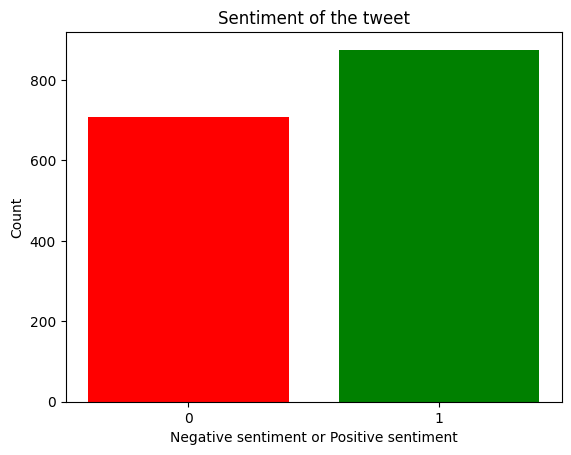

In [206]:
# Create a bar graph
plt.bar(counts_dict.keys(), counts_dict.values(), color=colors)
plt.xlabel('Negative sentiment or Positive sentiment')
plt.ylabel('Count')
plt.xticks(list(counts_dict.keys()))
plt.title('Sentiment of the tweet')
plt.show()